# Simulationsmodel



Als Nächstes wollen wir uns die explizite Implementierung der Physiksimulation genauer anschauen. Das Simulationsmodell soll in Unity erstellt werden. Zielt ist es 

* Einen Itterativen Impuls solver 
* mit Steuerung der translatorischen Bewegung
* und rotatorischen Bewegung
* sowie Regelung des Statischen Fehlers

zu implementieren. 



Die Simulationsumgebung soll es erlauben 

* Die Masse der Bälle einzustellen
* Den Radius der Bälle einzustellen
* Die Position der Wände und des Bodens einzustellen
    * Die Wände und der Boden müssen nicht notwendigerweise über den Impulse Solver erzeugt werden. Es können hier auch Überlegungen getroffen werden, wie das Verhalten dieser Strukturen angenähert oder Idealisiert werden kann. 
* Die Anzahl der Simulierten Bälle zu manipulieren
* Die Simulierten Bälle zu visualisieren
* Die Kontaktpunkte zu visualisieren
* Die Normal- und Tangentialvektoren des Kontaktpunktes zu visualisieren
* Den Normal- und Tangentialimpuls des Kontaktpunktes zu visualisieren

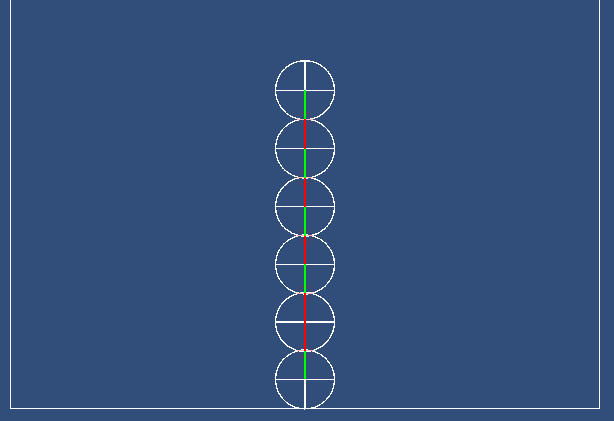

## Vorgehensweise 

### Class Ball

Zunächst soll eine Klasse geschrieben werden, welche alle notwendigen Informationen über den Collider beinhaltet. Diese Umfassen u.A.:

* Radius
* Masse 
* Massenträgheitsmoment
* Geschwindigkeit
* Position 
* Winkelgeschwindigkeit 
* Lagewinkel

Die Klasse muss ebenfalls Funktionen besitzen, über welche Lage und Geschwindigkeit, sowie Lagewinkel und Winkelgeschwindigkeit geändert werden können. 

Um den Impuls Solver verwenden zu können, wird eine Funktion benötigt, mit welcher ein Impuls auf den Ball gegeben werden kann. 

### Class Constraint

Ein Constraint ist in diesem Simulationsmodell eine Klasse (oder ein Struct) welche zwei Collider (in diesem Fall unsere Ball Klasse) verbindet. 

Sie enthällt alle Abhängigen Informationen über die Kollission, diese beinhalten unter Anderen

* Kontaktpunkt zwischen den beiden Collidern
* akkumulierten Gesamtimpuls 
* akkumulierten Tangentialimpuls
* Effektive Masse (Translation)
* Effektive Masse (Rotation / Tangential)

Sowie Funktionen um die 

* Überlappung
* Relative Geschwindigkeit im Kontaktpunkt

zu bestimmen.

Es ist bei der Definition des Kontakpunktes <span style="color:red">**EXTREM**</span> wichtig im Vorhinein festzulegen, in welche Richtung die Normalvektoren und Tangentialvektoren zeigen. Es ist sehr einfach hier Vorzeichenfehler einzubauen die erst spät im Prozess auffallen und vergleichsweise schwer zu Debuggen sind. 

Es soll auch überlegt werden, welches Vorzeichen für die Überlappung gelten soll im Bezug zum Normalvektor des Kontaktpunktes. 

### Class PhysicsHandler 

Diese Klasse verbindet alle Einzelteile die wir bisher gesammelt haben. Diese Klasse soll

* Eine Möglichkeit besitzen, die Anzahl der Velocity Solver Itterationen zu modifizieren
* Eine Möglichkeit besitzen, die Anzahl der Position Solver Itterationen zu modifizieren
* Die Größe der Virtuellen Box, in welcher die Simulation stattfindet zu modifizieren
* Die Gravitaions zu ändern
* Die Reibung zu ändern

Darüberhinaus besitzt sie Referenzen zu den simulierten Bällen, und ist in der Lage festzustellen, ob zwei Bälle überlappen oder die Virtuelle Box verlassen haben. 

#### Programmablauf 

* Bestimme, ob Bälle überlappen, oder die Virtuelle Box verlassen haben. 
    * Falls ja, erstelle einen Constraint, welcher diese Regelverletzung löst. 
* Integriere alle wirkenden Kräfte (hier zunächst nur die Schwerkraft)
* Itteriere in der festgelgten Anzahl über die Velocity Constraints
* Integriere die Geschwindigkeiten alles Simulierten Bälle
* Itteriere in der festgelgten Anzahl über die Position Constraints

## Position Constraint und Pseudo-Impuls

Warum nicht nur Velocity Constraint? 

Der Velocity Constraint trägt dafür Sorge, dass es zu keiner weiteren relativen Bewegung der im Constraint gebundenen Körper kommt. Alleine ist dieser jedoch nicht in der Lage einen bestehnden Fehler (die Überlappung) zu korrigieren. 

Anstatt die Position über einen echten Impuls zu korrigieren wollen wir hier stattdessen direkt auf die Position des Körpers einfluss nehmen. 

Die Verwendung eines echten Impulses bei der Korrektur der Position hätte zu Folge, dass mit jeder Itteration des Positionconstraint dem System Energie hinzugefügt wird. 

In der klassischen Darstellung würde gelten: 

$$
\dot C = V \cdot n - \beta \frac{s}{\Delta t}
$$

und der Impuls, welcher im Velocity Constraint aufgebaut wird, wird größer, je drastischer die Überlappung ist. $\beta$ ist hierbei ein Steuerungsfaktor. 

### Clamping $\lambda$

Wir müssen noch ein Problem lösen, welches auftreten kann, wenn wir Impuls integrieren. Wir können unser angestrebtes Ziel (die analytisch bestimmbare Reaktionskraft) überschreiten. Wenn wir den Impuls, welcher innerhalb einer Itteration eingebracht wird, nicht kappen, können wir aus einem Überschuss nicht zurückkeheren, wenn wir den Impuls direkt kappen. 

Hier können wir Erin Cattos Ansatz verwenden, um die Größen zu begrenzen:

NameError: name 'constraint' is not defined

Ein Großteil des hier vorgstellten Simulationsmodells basiert auf dieser Lesung von Erin Catto:

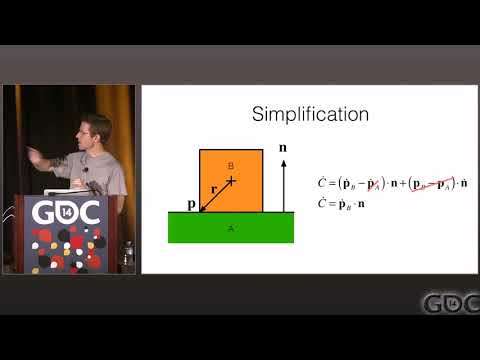

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("SHinxAhv1ZE", width=650)

### Weiterführende Ideen: 

Neben dem Constraint, der nur für einen Frame lebt, ist es auch möglich Constraints über mehrere Frames hinweg am Leben zu erhalten. Diese Praxis wird typischerweise als 'Warmstarting' bezeichnet. Vorteil des Warmstarting ist, dass der akkumulierte Impuls der letzten Itteration beibehalten wird und damit eine insgesamt stabilere Simulation erzeugt wird. 

Ein Problem von Warmstart Systemen ist jedoch, dass diese schlecht mit Ladungswechseln umgehen könne, da vor allen in gestapelten Objekten tiefer liegende Stützpunkte neben der 'echten' Last die im aktuellen Frame wirkt auch noch einen Teil der Last des letzten Frames stützen. 

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0]
(https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). 
Please attribute the work as follows: *Games Academy Berlin, Physics for Games Development, 2022*.